In [1]:
# !pip install beautifulsoup4
# !pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas import json_normalize

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
source1 = requests.get('https://en.wikipedia.org/wiki/List_of_regions_of_Tanzania_by_GDP').text
soup = BeautifulSoup(source1, 'lxml')
print(soup.title)

from IPython.display import display_html
my_table = str(soup.table)
display_html(my_table, raw=True)

<title>List of regions of Tanzania by GDP - Wikipedia</title>


Rank,Region,GDP in mil TZS,GDP in mil USD (PPP),Equivalent country[3]
1,Dar es Salaam,"22,577,225","29,585",Jamaica
2,Mwanza Region,"12,731,454","16,683",Mauritania
3,Shinyanga Region,"7,540,589","9,881",Maldives
4,Mbeya Region,"7,314,302","9,584",Suriname
5,Morogoro Region,"6,191,343","8,113",Burundi
6,Tanga Region,"6,016,873","7,884",Guyana
7,Arusha Region,"5,999,901","7,862",Guyana
8,Kilimanjaro Region,"5,754,677","7,541",Guyana
9,Kagera Region,"4,928,135","6,458",Lesotho
10,Ruvuma Region,"4,903,559","6,426",Lesotho


## Converting the table into pandas DataFrame

In [104]:
df = pd.read_html(my_table)
df = df[0]
df.head()

,Rank,Region,GDP in mil TZS,GDP in mil USD (PPP),Equivalent country[3]
0,1.0,Dar es Salaam,22577225,29585,Jamaica
1,2.0,Mwanza Region,12731454,16683,Mauritania
2,3.0,Shinyanga Region,7540589,9881,Maldives
3,4.0,Mbeya Region,7314302,9584,Suriname
4,5.0,Morogoro Region,6191343,8113,Burundi


## Data cleaning

In [105]:
df['Region'] = df['Region'].replace(' Region', '', regex=True)
df.head()

,Rank,Region,GDP in mil TZS,GDP in mil USD (PPP),Equivalent country[3]
0,1.0,Dar es Salaam,22577225,29585,Jamaica
1,2.0,Mwanza,12731454,16683,Mauritania
2,3.0,Shinyanga,7540589,9881,Maldives
3,4.0,Mbeya,7314302,9584,Suriname
4,5.0,Morogoro,6191343,8113,Burundi


## Droping the Equivalent country column

In [106]:
df = df.drop('Equivalent country[3]', 1)
df.head()

,Rank,Region,GDP in mil TZS,GDP in mil USD (PPP)
0,1.0,Dar es Salaam,22577225,29585
1,2.0,Mwanza,12731454,16683
2,3.0,Shinyanga,7540589,9881
3,4.0,Mbeya,7314302,9584
4,5.0,Morogoro,6191343,8113


In [107]:
df.drop({'Rank','GDP in mil USD (PPP)'}, axis=1, inplace=True)
df.head()

,Region,GDP in mil TZS
0,Dar es Salaam,22577225
1,Mwanza,12731454
2,Shinyanga,7540589
3,Mbeya,7314302
4,Morogoro,6191343


## Getting data from the second source so as to identify the population of each Region

In [110]:
source2 = requests.get('https://en.wikipedia.org/wiki/Regions_of_Tanzania').text
soup = BeautifulSoup(source2, 'lxml')
print(soup.title)

my_table2 = str(soup.table)
display_html(my_table2, raw=True)

<title>Regions of Tanzania - Wikipedia</title>


Region,Capital,Districts,Area,Population (2012),Postcode,Zone,Map
Arusha Region,Arusha,7,"37,576 km2 (14,508 sq mi)","1,694,310",23xxx,Northern,"<img alt=""Tanzania Arusha location map.svg"" data-file-height=""3143"" data-file-width=""3302"" decoding=""async"" height=""95"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/9/95/Tanzania_Arusha_location_map.svg/100px-Tanzania_Arusha_location_map.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/9/95/Tanzania_Arusha_location_map.svg/150px-Tanzania_Arusha_location_map.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/95/Tanzania_Arusha_location_map.svg/200px-Tanzania_Arusha_location_map.svg.png 2x"" width=""100""/>"
Dar es Salaam Region,Dar es Salaam,5,"1,393 km2 (538 sq mi)","4,364,541",11xxx,Coastal,"<img alt=""Tanzania DarEsSalaam location map.svg"" data-file-height=""3143"" data-file-width=""3302"" decoding=""async"" height=""95"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Tanzania_DarEsSalaam_location_map.svg/100px-Tanzania_DarEsSalaam_location_map.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Tanzania_DarEsSalaam_location_map.svg/150px-Tanzania_DarEsSalaam_location_map.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/df/Tanzania_DarEsSalaam_location_map.svg/200px-Tanzania_DarEsSalaam_location_map.svg.png 2x"" width=""100""/>"
Dodoma Region,Dodoma,7,"41,311 km2 (15,950 sq mi)","2,083,588",41xxx,Central,"<img alt=""Tanzania Dodoma location map.svg"" data-file-height=""3143"" data-file-width=""3302"" decoding=""async"" height=""95"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Tanzania_Dodoma_location_map.svg/100px-Tanzania_Dodoma_location_map.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Tanzania_Dodoma_location_map.svg/150px-Tanzania_Dodoma_location_map.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Tanzania_Dodoma_location_map.svg/200px-Tanzania_Dodoma_location_map.svg.png 2x"" width=""100""/>"
Geita Region,Geita,5,"20,054 km2 (7,743 sq mi)","1,739,530",30xxx,Lake,"<img alt=""Tanzania Geita Region location map.svg"" data-file-height=""3143"" data-file-width=""3302"" decoding=""async"" height=""95"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/5/54/Tanzania_Geita_Region_location_map.svg/100px-Tanzania_Geita_Region_location_map.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/5/54/Tanzania_Geita_Region_location_map.svg/150px-Tanzania_Geita_Region_location_map.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/54/Tanzania_Geita_Region_location_map.svg/200px-Tanzania_Geita_Region_location_map.svg.png 2x"" width=""100""/>"
Iringa Region,Iringa,5,"35,503 km2 (13,708 sq mi)","941,238",51xxx,Southern Highlands,"<img alt=""Tanzania Iringa location map.svg"" data-file-height=""3143"" data-file-width=""3302"" decoding=""async"" height=""95"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/5/55/Tanzania_Iringa_location_map.svg/100px-Tanzania_Iringa_location_map.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/5/55/Tanzania_Iringa_location_map.svg/150px-Tanzania_Iringa_location_map.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/55/Tanzania_Iringa_location_map.svg/200px-Tanzania_Iringa_location_map.svg.png 2x"" width=""100""/>"
Kagera Region,Bukoba,8,"25,265 km2 (9,755 sq mi)","2,458,023",35xxx,Lake,"<img alt=""Tanzania Kagera location map.svg"" data-file-height=""3143"" data-file-width=""3302"" decoding=""async"" height=""95"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Tanzania_Kagera_location_map.svg/100px-Tanzania_Kagera_location_map.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Tanzania_Kagera_location_map.svg/150px-Tanzania_Kagera_location_map.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Tanzania_Kagera_location_map.svg/200px-Tanzania_Kagera_location_map.svg.png 2x"" width=""100""/>"
Katavi Region,Mpanda,3,"4

## Converting the html into pandas DataFrame

In [111]:
df_population = pd.read_html(my_table2)
df_population = df_population[0]
df_population.head()

,Region,Capital,Districts,Area,Population (2012),Postcode,Zone,Map
0,Arusha Region,Arusha,7,"37,576 km2 (14,508 sq mi)",1694310,23xxx,Northern,NaN
1,Dar es Salaam Region,Dar es Salaam,5,"1,393 km2 (538 sq mi)",4364541,11xxx,Coastal,NaN
2,Dodoma Region,Dodoma,7,"41,311 km2 (15,950 sq mi)",2083588,41xxx,Central,NaN
3,Geita Region,Geita,5,"20,054 km2 (7,743 sq mi)",1739530,30xxx,Lake,NaN
4,Iringa Region,Iringa,5,"35,503 km2 (13,708 sq mi)",941238,51xxx,Southern Highlands,NaN


# Data cleaning

In [112]:
df_population.drop({'Area', 'Postcode', 'Districts', 'Capital', 'Map'}, axis=1, inplace=True)

In [113]:
df_population.head()

,Region,Population (2012),Zone
0,Arusha Region,1694310,Northern
1,Dar es Salaam Region,4364541,Coastal
2,Dodoma Region,2083588,Central
3,Geita Region,1739530,Lake
4,Iringa Region,941238,Southern Highlands


In [114]:
df_population['Region'] = df_population['Region'].replace(' Region', '', regex=True)

In [115]:
df_population.head()

,Region,Population (2012),Zone
0,Arusha,1694310,Northern
1,Dar es Salaam,4364541,Coastal
2,Dodoma,2083588,Central
3,Geita,1739530,Lake
4,Iringa,941238,Southern Highlands


## Merging the two dataframes

In [116]:
data = pd.merge(df, df_population, on='Region')
data.head()

,Region,GDP in mil TZS,Population (2012),Zone
0,Dar es Salaam,22577225,4364541,Coastal
1,Mwanza,12731454,2772509,Lake
2,Shinyanga,7540589,1534808,Lake
3,Mbeya,7314302,"2,707,410[a]",Southern Highlands
4,Morogoro,6191343,2218492,Coastal


## Removing the Songwe Region since it was part of Mbeya during the 2012 census

In [117]:
data = data[data.Region != 'Songwe']
data['Population (2012)'] = data['Population (2012)'].str.replace(',', '')
data['Population (2012)'] = data['Population (2012)'].str.extract('(\d+)', expand=False)
data["Population (2012)"] = data["Population (2012)"].astype(str).astype(int) # converting "Population (2012)" to integer from object type
data.head()

,Region,GDP in mil TZS,Population (2012),Zone
0,Dar es Salaam,22577225,4364541,Coastal
1,Mwanza,12731454,2772509,Lake
2,Shinyanga,7540589,1534808,Lake
3,Mbeya,7314302,2707410,Southern Highlands
4,Morogoro,6191343,2218492,Coastal


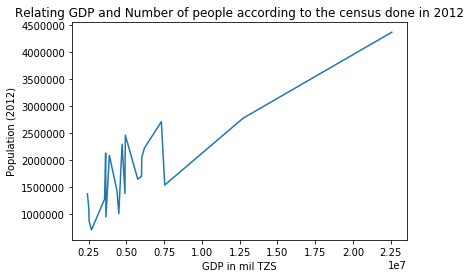

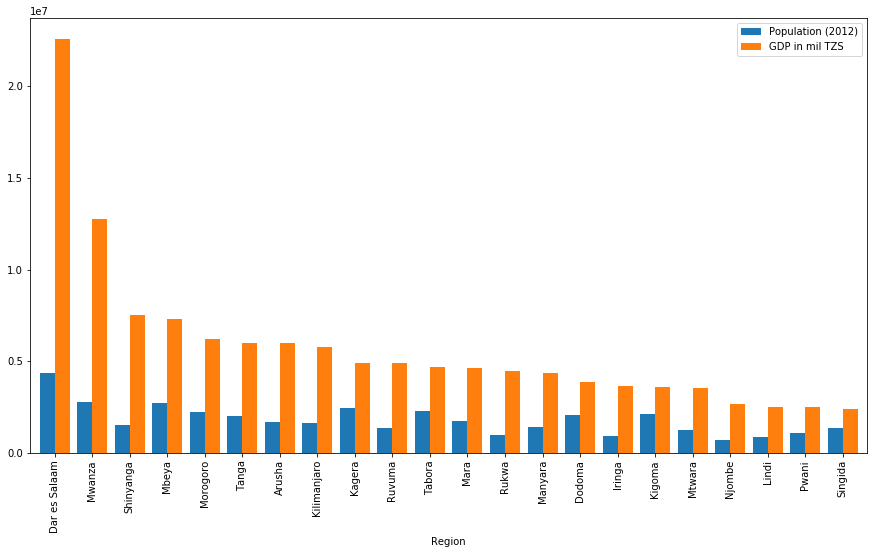

In [118]:
import matplotlib.pyplot as plt
plt.plot(data['GDP in mil TZS'], data['Population (2012)'])
plt.xlabel('GDP in mil TZS')
plt.ylabel('Population (2012)')
plt.title('Relating GDP and Number of people according to the census done in 2012')

data.plot(x="Region", y=["Population (2012)", "GDP in mil TZS"],
          kind="bar",
          figsize=(15, 8),
          width=0.8)

## Getting the latitude and longitude of each region for drawing a map

In [119]:
source3 = pd.read_csv('Regions_coordinates.csv')
source3.head()

,Region,Latitude,Longitude
0,Dar es Salaam,-6.82349,39.26951
1,Mwanza,-2.51667,32.90000
2,Mara,-1.83333,34.41667
3,Arusha,-3.36667,36.68333
4,Dodoma,-5.91667,35.91667


### Merging data and source3 dataframes

In [125]:
df_all = pd.merge(data, source3, on='Region')
df_all.head()

,Region,GDP in mil TZS,Population (2012),Zone,Latitude,Longitude
0,Dar es Salaam,22577225,4364541,Coastal,-6.82349,39.26951
1,Mwanza,12731454,2772509,Lake,-2.51667,32.90000
2,Shinyanga,7540589,1534808,Lake,-3.66667,32.91667
3,Mbeya,7314302,2707410,Southern Highlands,-8.90000,33.45000
4,Morogoro,6191343,2218492,Coastal,-7.91667,37.25000


In [17]:
address = 'Tanzania'
geolocator = Nominatim(user_agent='the_tanzania')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('Latitude and longitude of Tanzania are {} and {} respectively'.format(latitude, longitude))

Latitude and longitude of Tanzania are -6.5247123 and 35.7878438 respectively


In [124]:
map_tz = folium.Map(location=[latitude, longitude], zoom_start=4)

# Add marker to the map
for lat, lon, region, population in zip(df_all['Latitude'], df_all['Longitude'], df_all['Region'], df_all['Population (2012)']):
    labels = '{}, {} '.format(region, population)
    labels = folium.Popup(labels, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        color='red',
        fill_color='blue',
        radius=5,
        popup=labels,
        fill_opacity=0.7,
        fill=True,
        parse_html=False
    ).add_to(map_tz)
map_tz

## Using KMeans to cluster regions according to GDP and Population

In [127]:
k=5
tz_clustering = df_all.drop(['Region', 'Zone'], 1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(tz_clustering)
kmeans.labels_
df_all.insert(0, 'Cluster Labels', kmeans.labels_)

In [128]:
df_all.head()

,Cluster Labels,Region,GDP in mil TZS,Population (2012),Zone,Latitude,Longitude
0,1,Dar es Salaam,22577225,4364541,Coastal,-6.82349,39.26951
1,2,Mwanza,12731454,2772509,Lake,-2.51667,32.90000
2,4,Shinyanga,7540589,1534808,Lake,-3.66667,32.91667
3,4,Mbeya,7314302,2707410,Southern Highlands,-8.90000,33.45000
4,4,Morogoro,6191343,2218492,Coastal,-7.91667,37.25000


In [21]:
# create map
map_cluster = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon,gdp, region, cluster in zip(df_all['Latitude'], df_all['Longitude'], df_all['GDP in mil TZS'], df_all['Region'], df_all['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster)+', GDP '+ str(gdp) + ' mill TZS', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cluster)
       
map_cluster

## Now let use foursquare to explore some venues in Dar es Salaam

In [22]:
CLIENT_ID = 'G3LLZLHVAUSJZO0SHCCMV1ET0ELAHLYJ0BB4C2D0DKGEUXO0' # your Foursquare ID
CLIENT_SECRET = 'TZERFWFELN5XK3JZ0P4FPQPSDTWNZDJXPBE15VG0WWLGERWF' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G3LLZLHVAUSJZO0SHCCMV1ET0ELAHLYJ0BB4C2D0DKGEUXO0
CLIENT_SECRET:TZERFWFELN5XK3JZ0P4FPQPSDTWNZDJXPBE15VG0WWLGERWF


#### Let's again assume that we are so concerned about exploring Dar es Salaam. So let's start by converting the Dar es Salaam's address to its latitude and longitude coordinates.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below.

In [23]:
address = 'Dar es Salaam, Tanzania'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-6.8160837 39.2803583


#### Now, let's assume that you want to do a business, and you are looking for market places. So, let's define a query to search for market that is within 5000 metres from the Bibi Titi Mohammed Street. 

In [24]:
search_query = 'Market'
radius = 5000
print(search_query + ' .... OK!')

Market .... OK!


## Defining the corresponding url

In [25]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=G3LLZLHVAUSJZO0SHCCMV1ET0ELAHLYJ0BB4C2D0DKGEUXO0&client_secret=TZERFWFELN5XK3JZ0P4FPQPSDTWNZDJXPBE15VG0WWLGERWF&ll=-6.8160837,39.2803583&v=20180604&query=Market&radius=5000&limit=30'

## Sending get request and examining the results

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f539c2590de8678c3659d87'},
 'response': {'venues': [{'id': '5198eb12498edba16e1d4dec',
    'name': 'Kisutu Market',
    'location': {'lat': -6.817484192449897,
     'lng': 39.28042191785445,
     'labeledLatLngs': [{'label': 'display',
       'lat': -6.817484192449897,
       'lng': 39.28042191785445}],
     'distance': 156,
     'cc': 'TZ',
     'country': 'Tanzania',
     'formattedAddress': ['Tanzania']},
    'categories': [{'id': '50be8ee891d4fa8dcc7199a7',
      'name': 'Market',
      'pluralName': 'Markets',
      'shortName': 'Market',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/market_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1599314776',
    'hasPerk': False},
   {'id': '4e43cdd71f6e0a1ba5d503a5',
    'name': 'Kisutu Market',
    'location': {'lat': -6.817233932077075,
     'lng': 39.28171989926522,
     'labeledLatLngs': [{'label': 'display',
       'lat': -6.817233932077075,
  

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [27]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# Let transform venues into pandas dataframe
dataframe = pd.DataFrame(venues)
dataframe.head()

,id,name,location,categories,referralId,hasPerk,venuePage
0,5198eb12498edba16e1d4dec,Kisutu Market,"{'lat': -6.817484192449897, 'lng': 39.28042191...","[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",v-1599314776,False,NaN
1,4e43cdd71f6e0a1ba5d503a5,Kisutu Market,"{'lat': -6.817233932077075, 'lng': 39.28171989...","[{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...",v-1599314776,False,NaN
2,50445f37e4b068ce7e21da99,Kivukoni Fish Market,"{'lat': -6.8189232426173625, 'lng': 39.2997570...","[{'id': '4bf58dd8d48988d10e951735', 'name': 'F...",v-1599314776,False,NaN
3,4e44f6aa7d8bee2823a3651c,Kariakoo Market,"{'lat': -6.8189300322379625, 'lng': 39.2752145...","[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",v-1599314776,False,NaN
4,501857a0e4b0072c28d91b1c,Dallas Mini Market,"{'address': 'Dar Es Salaam', 'crossStreet': 'L...","[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1599314776,False,NaN


### Lets define the information of interest and filter the dataframe

In [28]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id'] + ['location']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,id,location
0,Kisutu Market,Market,5198eb12498edba16e1d4dec,"{'lat': -6.817484192449897, 'lng': 39.28042191..."
1,Kisutu Market,Miscellaneous Shop,4e43cdd71f6e0a1ba5d503a5,"{'lat': -6.817233932077075, 'lng': 39.28171989..."
2,Kivukoni Fish Market,Fish Market,50445f37e4b068ce7e21da99,"{'lat': -6.8189232426173625, 'lng': 39.2997570..."
3,Kariakoo Market,Market,4e44f6aa7d8bee2823a3651c,"{'lat': -6.8189300322379625, 'lng': 39.2752145..."
4,Dallas Mini Market,Grocery Store,501857a0e4b0072c28d91b1c,"{'address': 'Dar Es Salaam', 'crossStreet': 'L..."


## Let's visualize the markets that are nearby

Lets first extract the latitudes and longitudes of the markets from the location columns

In [29]:
lat = []
lng = []
for i in dataframe_filtered.location:
    lat.append(i['lat'])
    lng.append(i['lng'])
#     dataframe_filtered.location[i]
print(lat,'\n', lng)

[-6.817484192449897, -6.817233932077075, -6.8189232426173625, -6.8189300322379625, -6.815720081329346, -6.778927307516188, -6.814825, -6.8202184, -6.825920435800235, -6.823240688024467, -6.825997576079736, -6.833310385929226, -6.78807362102654, -6.795672, -6.790742302278798, -6.777729, -6.777371389135917, -6.801707, -6.768208117346119, -6.768804978208594, -6.760474287290995, -6.801883191914751] 
 [39.28042191785445, 39.28171989926522, 39.29975703883606, 39.27521451221239, 39.283058166503906, 39.27991643583157, 39.289125, 39.2892676, 39.27486463211464, 39.26770091056824, 39.26556927891945, 39.272111159963636, 39.27834306369571, 39.266763, 39.27054928421516, 39.278939, 39.26610178302875, 39.224929, 39.274717569351196, 39.2661930689952, 39.26870338119584, 39.22981020495527]


#### Lets convert the above arrays into pandas dataframe

In [30]:
dataset = pd.DataFrame({'lat': lat, 'lng': lng}, columns=['lat', 'lng'])
dataset.head()

,lat,lng
0,-6.817484,39.280422
1,-6.817234,39.281720
2,-6.818923,39.299757
3,-6.818930,39.275215
4,-6.815720,39.283058


##### Now lets join the two DataFrames

In [31]:
dataframe_filtered = pd.concat([dataframe_filtered, dataset], axis=1)
dataframe_filtered.head()

,name,categories,id,location,lat,lng
0,Kisutu Market,Market,5198eb12498edba16e1d4dec,"{'lat': -6.817484192449897, 'lng': 39.28042191...",-6.817484,39.280422
1,Kisutu Market,Miscellaneous Shop,4e43cdd71f6e0a1ba5d503a5,"{'lat': -6.817233932077075, 'lng': 39.28171989...",-6.817234,39.281720
2,Kivukoni Fish Market,Fish Market,50445f37e4b068ce7e21da99,"{'lat': -6.8189232426173625, 'lng': 39.2997570...",-6.818923,39.299757
3,Kariakoo Market,Market,4e44f6aa7d8bee2823a3651c,"{'lat': -6.8189300322379625, 'lng': 39.2752145...",-6.818930,39.275215
4,Dallas Mini Market,Grocery Store,501857a0e4b0072c28d91b1c,"{'address': 'Dar Es Salaam', 'crossStreet': 'L...",-6.815720,39.283058


##### The location column is not needed, so lets drop it

In [32]:
dataframe_filtered.drop({'location'}, axis=1, inplace=True)
dataframe_filtered.head()

,name,categories,id,lat,lng
0,Kisutu Market,Market,5198eb12498edba16e1d4dec,-6.817484,39.280422
1,Kisutu Market,Miscellaneous Shop,4e43cdd71f6e0a1ba5d503a5,-6.817234,39.281720
2,Kivukoni Fish Market,Fish Market,50445f37e4b068ce7e21da99,-6.818923,39.299757
3,Kariakoo Market,Market,4e44f6aa7d8bee2823a3651c,-6.818930,39.275215
4,Dallas Mini Market,Grocery Store,501857a0e4b0072c28d91b1c,-6.815720,39.283058


In [33]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around the Bibi Titi Mohammed Street

# add a red circle marker to represent the Bibi Titi Mohammed Street
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Bibi Titi Mohammed Street',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the markets as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map